# matplotlib exercises

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from __future__ import print_function

## Q1: planetary positions

The distances of the planets from the Sun (technically, their semi-major axes) are:

In [2]:
a = np.array([0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.22, 30.06, 39.48]) # AU

These are in units where the Earth-Sun distance is 1 (astronomical units).

The corresponding periods of their orbits (how long they take to go once around the Sun) are, in years

In [3]:
P = np.array([0.24, 0.62, 1.00, 1.88, 11.86, 29.46, 84.01, 164.8, 248.09]) # yrs

Finally, the names of the planets corresponding to these are:

In [4]:
names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", 
         "Uranus", "Neptune", "Pluto"]

(technically, pluto isn't a planet anymore, but we still love it :)

  * Plot as points, the periods vs. distances for each planet on a log-log plot.

  * Write the name of the planet next to the point for that planet on the plot
  
----
### My solution:

I've also added a line for Kepler's third law, $P^2 = a^3$ where $P$ is the period in years and $a$ is the semimajor axis of the orbit in AU.

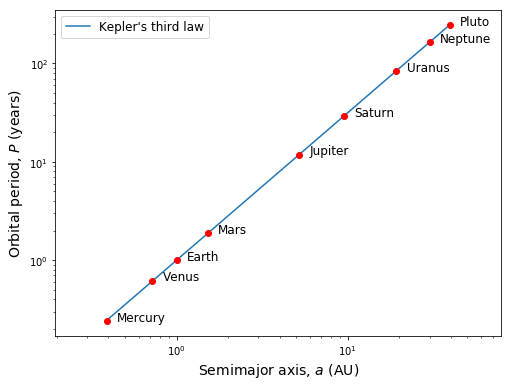

In [5]:
# create the figure
fig, ax = plt.subplots(figsize=(8,6))

# plot line for Kepler's 3rd law
semimajor_axis = np.linspace(np.min(a), np.max(a), 100) # get points between min/max semimajor axis
period = semimajor_axis**(3./2.)
ax.plot(semimajor_axis, period, label="Kepler's third law")

# plot the points
ax.plot(a, P, 'o', color='r')
# add labels to each point
for dist, period, name in zip(a, P, names):
    # the name is the label text (first argument)
    # (dist, period) gives x, y coordinatte to be annotated (second argument)
    # also want to place the text slightly away from the point, so try to increase
    #    x coordinate a bit by multiplying it by 1.15
    ax.annotate(name, (dist, period), xytext=(1.15*dist, period), fontsize=12)

# set log scales
ax.set_yscale('log')
ax.set_xscale('log')

# label the axes
ax.set_xlabel(r"Semimajor axis, $a$ (AU)", fontsize=14)
ax.set_ylabel(r"Orbital period, $P$ (years)", fontsize=14)

# increase x margin so text is visible
ax.margins(x=0.15)

# add the legend
ax.legend(fontsize=12)

# show the plot
plt.show()

---
## Q2: drawing a circle

For an angle $\theta$ in the range $\theta \in [0, 2\pi]$, the polar equations of a circle of radius $R$ are:
$$
x = R\cos(\theta)
$$
$$ 
y = R\sin(\theta)
$$

We want to draw a circle.   

  * Create an array to hold the theta values&mdash;the more we use, the smoother the circle will be
  * Create `x` and `y` arrays from `theta` for your choice of $R$
  * Plot `y` vs. `x`
  
Now, look up the matplotlib `fill()` function, and draw a circle filled in with a solid color.

---
### My solution

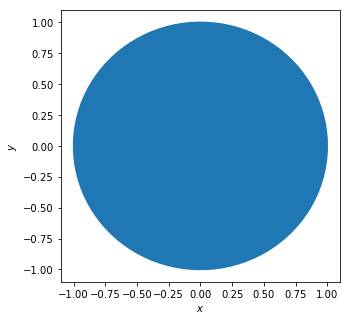

In [6]:
theta = np.linspace(0., 2.*np.pi, 100) # values of the angles in radians
R = 1.0 # radius in arbitrary units

x = R * np.cos(theta) # the x values
y = R * np.sin(theta) # the y values

# make the plot
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, y) # plot x, y
ax.fill(x,y)  # fill in the circle
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
plt.show()

---
## Q3: Circles, circles, circles...

Generalize your circle drawing commands to produce a function, 
```
draw_circle(x0, y0, R, color)
```
that draws the circle.  Here, `(x0, y0)` is the center of the circle, `R` is the radius, and `color` is the color of the circle.  

Now randomly draw 10 circles at different locations, with random radii, and random colors on the same plot.

---
### My solution:

First, define the function. I've added an additional argument `ax`, which is the axis the circle should be drawn on.

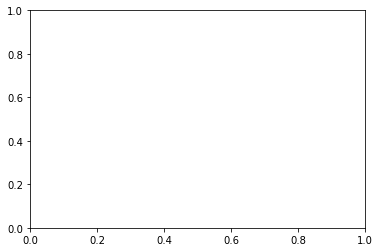

In [7]:
def draw_circle(x0, y0, R, color, ax=plt.gca()):
    """Draw a filled circle on a plt.
    
    Parameters
    ----------
    x0, y0 : int or float
        The cartesian coordinates of the center of the circle.
    R : int or float
        The radius of the circle, in arbitrary units.
    color : str
        The color of the circle. Must be a valid `matplotlib` color.
    ax : a `matplotlib.axes.Axes` object
        The set of axes on which to draw the circle.
    """
    
    theta = np.linspace(0., 2.*np.pi, 100) # values of the angles in radians

    x = x0 + R * np.cos(theta) # the x values
    y = y0 + R * np.sin(theta) # the y values
    
    ax.plot(x, y, color='k') # plot x, y coordinates of circle, with a black outline
    ax.fill(x, y, color=color, alpha=0.5)  # fill in the circle; use 'alpha' to adjust transparency (alpha=1 is opaque)

Draw 10 random locations, radii, and colors. 

- Let the centers of the circles lie in the range $-5 \leq x_0 \leq 5$ and $-5 \leq y_0 \leq 5$.
- Let the range of radii be $ 0.1 \leq R \leq 1$.
- Choose from the "tableau palette" of [`matplotlib` colors](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

In [8]:
import random

num_circles = 10 # total number of circles to be drawn

# upper and lower limits for center (x0, y0)
x0min = -5.
x0max = 5.
y0min = -5.
y0max = 5.
centers = [] # list to hold sets of coordinates
for i in range(num_circles):
    # generate random coordinates and add them to the list
    x0 = random.uniform(x0min, x0max)
    y0 = random.uniform(y0min, y0max)
    centers.append((x0, y0))
    
    
# upper and lower limits of radii
Rmin = 0.1 # choose a small number for minimum
Rmax = 1.0
radii = [] # empty list to hold radii
for i in range(num_circles):
    # generate random radii and add to the list
    R = random.uniform(Rmin, Rmax)
    radii.append(R)
 
    
# choose colors
valid_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
               'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
colors = [] # will hold random choices
for i in range(num_circles):
    # choose a random color and add to list
    color = random.choice(valid_colors)
    colors.append(color)

Finally, make the plot:

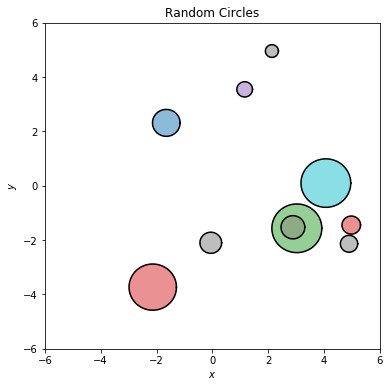

In [9]:
fig, ax = plt.subplots(figsize=(6,6))

# set the title and axis labels
ax.set_title("Random Circles")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")

# set x, y limits so plot shows circles (instead of ovals)
ax.set_xlim([x0min-Rmax, x0max+Rmax])
ax.set_ylim([y0min-Rmax, y0max+Rmax])

# draw the circles using the draw_circle() function
for center, radius, color in zip(centers, radii, colors):
    x0, y0 = center # get x, y coordinate of center
    draw_circle(x0, y0, radius, color, ax=ax)
    
plt.show()

---
## Q4: Climate

Download the data file of global surface air temperature averages from here:
https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt

(this data comes from: https://data.giss.nasa.gov/gistemp/graphs/)

There are 3 columns here: the year, the temperature change, and a smoothed representation of the temperature change.  

  * Read in this data using `np.loadtxt()`.  
  * Plot as a line the smoothed representation of the temperature changes.  
  * Plot as points the temperature change (no smoothing).  Color the points blue if they are < 0 and color them red if they are >= 0
  
You might find the NumPy `where()` function useful.

---
### My solution:
Read the data in from the file, and use `np.where()` to find the indices where the temperature change is positive or negative:

In [10]:
year, deltaT, deltaTsmooth = np.loadtxt('nasa-giss.txt', unpack=True)

# find the indices where the un-smoothed temperature change is positive
positive_idxs = np.where(deltaT >= 0.0)
# find the indices where the un-smoothed temperature change is negative
negative_idxs = np.where(deltaT < 0.0)

Make the plot:

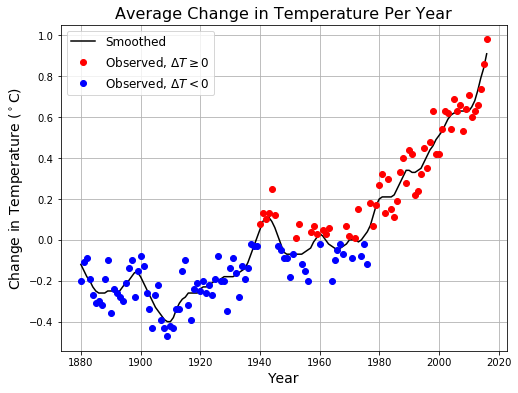

In [11]:
fig, ax = plt.subplots(figsize=(8,6))

# plot the data
ax.plot(year, deltaTsmooth, color='k', label="Smoothed") # smoothed data as a line
ax.plot(year[positive_idxs], deltaT[positive_idxs], 'o', 
        color='r', label=r"Observed, $\Delta T \geq 0$")  # positive data as red points
ax.plot(year[negative_idxs], deltaT[negative_idxs], 'o', 
        color='b', label=r"Observed, $\Delta T < 0$")     # negative data as blue points

# label the titles and axis labels
ax.set_title("Average Change in Temperature Per Year", fontsize=16)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel(r"Change in Temperature ($^\circ$C)", fontsize=14)

# add a legend and a grid
ax.legend(fontsize=12) 
ax.grid()

plt.show()

---
## Q5: subplots

matplotlib has a number of ways to create multiple axes in a figure -- look at `plt.subplot()` (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)

Create an `x` array using NumPy with a number of points, spanning from $[0, 2\pi]$.  

Create 3 axes vertically, and do the following:

* Define a new numpy array `f` initialized to a function of your choice.
* Plot f in the top axes
* Compute a numerical derivative of `f`,
   $$ f' = \frac{f_{i+1} - f_i}{\Delta x}$$
  and plot this in the middle axes
* Do this again, this time on $f'$ to compute the second derivative and plot that in the bottom axes
---
### My solution:

In [12]:
# create x, from 0 to 2pi:
N = 100 # number of x points
xmin = 0.0 
xmax = 2.0 * np.pi
dx = (xmax - xmin) / float(N) # spacing between points
x = np.linspace(xmin, xmax , N) 

I chose the function $f(x) = \sin(x)$.

In [13]:
f = np.sin(x) # array of f(x) evalualted at each x

We can approximate $df/dx$ at the midpoints (the points halfway between the values in `x`), $x_{i,\textrm{mid}} = \left( x_i + x_{i+1} \right) / 2 $ for $i = 0, ..., N-1$:

$$ f_{i,\textrm{mid}}' = \frac{f_{i+1} - f_i}{\Delta x}, $$

where $f_i$ is `f[i]` for `i = 0, ..., N` and $\Delta x$ is `dx`. 

We saw in the Numpy exercises that this can be done easily by slicing arrays: the array of $f_{i+1} - f_i$ is just `f[1:] - f[:-1]`, and the array of $x_{i,\textrm{mid}}$ is `(x[1:] + x[:-1]) / 2.0`.

In [14]:
xmid = (x[1:] + x[:-1]) / 2.0
df = (f[1:] - f[:-1]) / dx # array of df/dx, evaluated at each x.

Repeat the same steps to approximate $d^2 f / dx^2$:

In [15]:
x2mid = (xmid[1:] + xmid[:-1]) / 2.
d2f = (df[1:] - df[:-1]) / dx

Finally, make the plot:

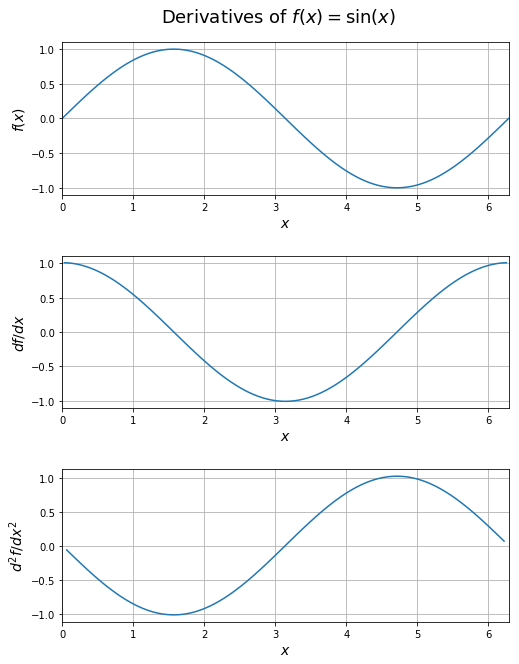

In [16]:
fig = plt.figure(figsize=(8,10))
fig.suptitle(r"Derivatives of $f(x) = \sin(x)$", fontsize=18) # gives a title to the whole figure

# plot f(x)
ax1 = plt.subplot(311) # 3 rows, 1 column, 1st plot
ax1.plot(x, f)
ax1.set_xlabel(r"$x$", fontsize=14)
ax1.set_ylabel(r"$f(x)$", fontsize=14)
ax1.set_xlim([xmin,xmax])
ax1.grid()

# plot f'(x)
ax2 = plt.subplot(312) # 3 rows, 1 column, 2nd plot
ax2.plot(xmid, df)
ax2.set_xlabel(r"$x$", fontsize=14)
ax2.set_ylabel(r"$df/dx$", fontsize=14)
ax2.set_xlim([xmin,xmax])
ax2.grid()

# plot f''(x)
ax3 = plt.subplot(313) # 3 rows, 1 column, 3rd plot
ax3.plot(x2mid, d2f)
ax3.set_xlabel(r"$x$", fontsize=14)
ax3.set_ylabel(r"$d^2 f / dx^2$", fontsize=14)
ax3.set_xlim([xmin,xmax])
ax3.grid()

plt.subplots_adjust(hspace=0.4, top=0.93) # adjust spacing of the subplots

plt.show()

---
## Q6: frequent words plotting

In this exercise, we will read the file with the transcription of _Star Trek TOS, Shore Leave_ and calculate the amount of time each word was found. We will then plot the 25 most frequent words and label the plot.

### 6.1 Read the file and create the dictionaty {'word':count}

   * Open the `shore_leave.txt`
   * Create the dictionary of the form {'word':count}, where `count` shows the amount of times the word was found in the text. Remember to get rid of the punctuation ("." and ",") and to ensure that all words are lowercase

---
#### My solution:
Open the file, and get the text as a string by using the `read()` method.

Then, get a list of words using the `split()` method on the string.

Use the `replace()` method to replace any punctuation marks with empty strings, and the `lower()` method to make everything lowercase.

In [17]:
fname = "shore_leave.txt"
# open the file
with open(fname, 'r') as f: # open the file for reading, and name it f; `with` means we don't need to close it after
    text = f.read()

# get rid of punctuation
punctuation = ['.', ',', '!', '?', ':', ';']
for p in punctuation:
    text = text.replace(p, "")
text = text.lower() # make everything lowercase
words = text.split() # get the words (any characters separated by spaces)

Create a dictionary `word_count` that will hold each word as a key and the frequency of that word as its value.

We can initialize the dictionary by using the `set()` function to get a set of the words in the list, and use this to set the keys. We will set each value to zero to start.

In [18]:
set_of_words = list(set(words))
word_count = {word: 0 for word in set_of_words}

Now loop through the `words` list, and for each word, add to the counter stored in the `word_count` dictionary:

In [19]:
for word in words:
    word_count[word] += 1

### 6.2 Plot 25 most frequent words

Plot a labelled bar chart of the most frequent 25 words with their frequencies.

---
#### My solution:

I had to look up how to sort the dictionary, and I found [this solution](https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value), which I've used below.

- Use the `sorted()` function on the dictionary `word_count`.

- Use the `key` argument of `sorted()`, which tells the function how to sort the argument. Here the key is `word_count.get`

    - The `dict.get(name)` method returns the `value` corresponding to the dictionary key named `name`; same as `dict[name] = value`.

In [20]:
most_freq_words = sorted(word_count, key=word_count.get, reverse=True)[:25] # get the 25 most frequent words
# print them out
for word in most_freq_words:
    print(word, word_count[word])

the 162
a 133
you 132
i 128
is 105
to 102
and 96
it 82
of 69
not 57
captain 53
have 50
are 48
that 47
this 46
he 44
in 40
on 38
what 37
all 34
sulu 34
we 34
kirk 33
mister 33
do 32


Now make a bar chart using `plt.bar(x, height)` where `x` is the position along the $x$ axis and `height` is the height of the bar:

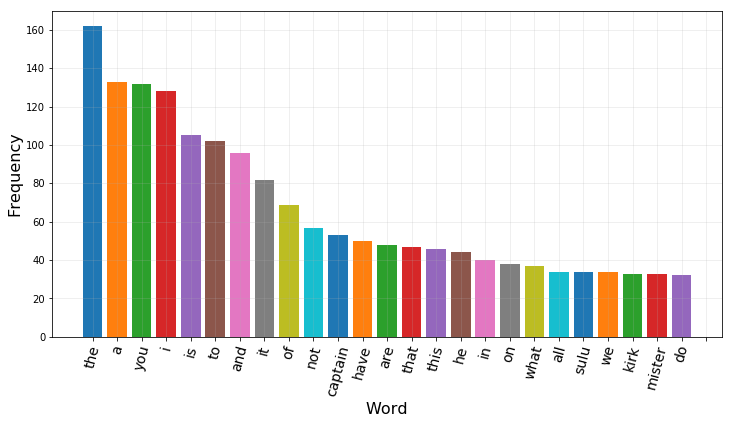

In [21]:
plt.figure(figsize=(12,6))

# add a grid
plt.grid(alpha=0.25)

# plot the bars
for i, word in enumerate(most_freq_words):
    # i is the position in the sorted list: i=0 is most frequent, etc.
    # plot i on x-axis and the frequency of the word as the height
    plt.bar(i, word_count[word])
    
# use the word as the label on the x-axis, instead of the index i
plt.xticks(range(26), most_freq_words, rotation=75, fontsize=14)
# label the axes
plt.ylabel("Frequency", fontsize=16)
plt.xlabel("Word", fontsize=16)

plt.show()

---
## Q7: Mandelbrot set

The mandelbrot set is defined such that $z_{k+1} = z_k^2 + c$
remains bounded, which is usually taken as $|z_{k+1}| <= 2$
where $c$ is a complex number and we start with $z_0 = 0$

We want to consider a range of $c$, as complex numbers $c = x + iy$,
where $-2 < x < 2$ and $-2 < y < 2$.

For each $c$, identify its position on a Cartesian grid as $(x,y)$ and 
assign a value $N$ that is the number of iterations, $k$, required for $|z_{k+1}|$ to become greater than $2$.

The plot of this function is called the Mandelbrot set.

---
### My solution - TODO

Sorry, I didn't have a chance to complete this question yet.